# Part I: Theory

## Q1) LTI Systems and Convolution

First I will prove 
$$x(n) = \sum_{k=0}^{+ \infty} x(k) \delta (n-k)$$
We know
$$
\begin{aligned}
x(n) &= \sum_{k=0}^{n-1}0 x(k)+1x(n)+\sum_{k=n+1}^{+ \infty}0x(k) \\
    &= \sum_{k=0}^{n-1}0 x(k)+\delta(0)x(n)+\sum_{k=n+1}^{+ \infty}0x(k)\\
    &= \sum_{k=0}^{n-1} \delta (n-k) x(k)+ \delta (n-n) x(n)+\sum_{k=n+1}^{+ \infty} \delta (n-k) x(k) &\text{property of $\delta$} \\
    &= \sum_{k=0}^{+ \infty} x(k) \delta (n-k)
\end{aligned}
$$
Therefore, 
$$
\begin{aligned}
T(x(n)) &= T(\sum_{k=0}^{+ \infty} x(k) \delta (n-k)) \\
      &= \sum_{k=0}^{+ \infty} x(k) T(\delta(n-k)) &\text{by linearity} \\
      &= \sum_{k=0}^{+ \infty} x(k)h(n-k)\\
      &= x(n)*h(n)
\end{aligned}
$$

## Q2) Polynomial Multiplication and Convolution

Let $\textbf{u}$ be a vector with $n+1$ dimension and $\textbf{v}$ be a vector with $m+1$ dimension, where $m, n \in \mathbb{N^+}$ 

$\textbf{Note}$: index starts from 0.

By definition of convolution, we can know 
$$
\begin{aligned}
(u*v)(k) &= \sum_{i+j=k \land i \leq n \land j \leq m}u_iv_j
\end{aligned}
$$

Consider the coefficient of $x^k$ in the polynomial multiplication, where $k \in \mathbb{N^+} \land k \leq m+n$

By the property of polynomial multiplication,

$$c(k) = \sum_{i=0}^{min \{ k,n \}} u_iv_{k-i}= \sum_{i+j=k \land i \leq n \land j \leq m}u_iv_j=(u*v)(k)$$

Therefore, they are equivalent.

## Q3) Laplacian Operator

$$
\begin{aligned}
\frac{\partial}
\end{aligned}
$$

## Q4) Edge Detection

In [99]:
import numpy as np

import math

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# Reference (Gaussian distribution): https://en.wikipedia.org/wiki/Gaussian_function
def getGaussianKernel(H=3, W=3, sigma=1):
    if sigma == 0:
        sigma = 1
    gaussMatrix = np.zeros([H, W], np.float32)
    # get the center
    cH = (H - 1) / 2
    cW = (W - 1) / 2
    # calculate gauss(sigma, r, c)
    for r in range(H):
        for c in range(W):
            norm2 = (r - cH)**2 + (c - cH)**2
            gaussMatrix[r][c] = math.exp(-norm2 / (2 * (sigma**2)))
    sumGM = np.sum(gaussMatrix)
    gaussKernel = gaussMatrix / sumGM
    return gaussKernel

In [82]:
def visualize(size, sigma):
    kernel = getGaussianKernel(size[0], size[1], sigma)
    fig = plt.figure()
    ax = Axes3D(fig)
    X = np.arange(-(size[0]-1)/2, (size[0]-1)/2+1, 1)
    Y = np.arange(-(size[1]-1)/2, (size[1]-1)/2+1, 1)
    X, Y = np.meshgrid(X, Y)
    Z = kernel
    plt.title('sigma = {}, with kernel size = {}'.format(sigma, size))
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

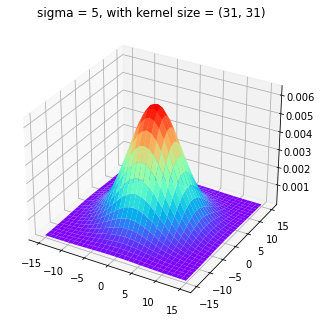

In [142]:
visualize((31,31),5)

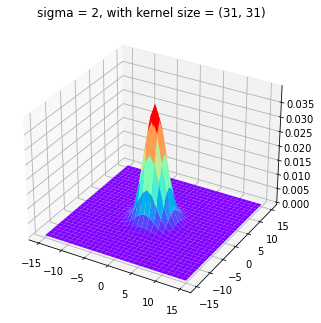

In [141]:
visualize((31,31), 2)

In [171]:
def getGaussianBlur(image, ksize=5, sigma=1):
    rows, cols = image.shape
    padding = ksize - 1
    kernel = getGaussianKernel(ksize, ksize, sigma)
    imgTmp = np.zeros([rows+2*padding, cols+2*padding])
    imgTmp[padding:rows+padding, padding:cols+padding] = image[:, :]
    output = np.zeros([rows+2*(ksize//2), cols+2*(ksize//2)])
    for i in range(rows+2*(ksize//2)):
        for j in range(cols+2*(ksize//2)):
            output[i][j] = np.sum(kernel * imgTmp[i:i+ksize, j:j+ksize])
    return output

In [143]:
def getGradImage(image):
    rows, cols = image.shape
    sobelx = np.array([[-1, -2, -1],
                       [0 ,  0,  0],
                       [1 ,  2,  1]])
    
    sobely = np.array([[-1,  0, 1],
                       [-2,  0,  2],
                       [-1,  0,  1]])
    
    def sobelConv(image, sobel):
        imgTmp = np.zeros([rows+4, cols+4])
        imgTmp[2:rows+2, 2:cols+2] = image[:, :]
        output = np.zeros([rows+2, cols+2])
        for i in range(0, rows+2):
            for j in range(0, cols+2):
                tmpi = i + 1
                tmpj = j + 1
                for u in range(-1, 2):
                    for v in range(-1, 2):
                        output[i][j] += sobel[1+u][1+v] * imgTmp[tmpi-u][tmpj-v]
        
        return output
    
    gradx = sobelConv(image, sobelx)
    grady = sobelConv(image, sobely)
    
    return np.sqrt(gradx**2 + grady**2)

In [178]:
def edgeDetection(gradImage):
    rows, cols = gradImage.shape
    currTau = np.sum(gradImage) / (rows * cols)
    prevTau = -1
    edges = []
    output = np.zeros((rows, cols))
    while prevTau == -1 or abs(currTau - prevTau) > 0.01:
#         print(abs(currTau - prevTau))
        output = np.zeros((rows, cols))
        Lval = []
        Hval = []
        for i in range(rows):
            for j in range(cols):
                if gradImage[i][j] < currTau:
                    Lval.append(gradImage[i][j])
                    output[i][j] = 0
                else:
                    Hval.append(gradImage[i][j])
                    output[i][j] = 255
        prevTau = currTau
        currTau = (sum(Hval)/len(Hval) + sum(Lval)/len(Lval)) / 2
    
    return output

In [111]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [186]:
def getResult(path):
    image = mpimg.imread(path)
    
    grayImage = rgb2gray(image)
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title('Gray Image')
    plt.imshow(grayImage, cmap='gray')
    plt.show()
    
    print("Get gray image.")
    blurredImage = getGaussianBlur(grayImage, sigma=2)
    print("Get blurred image.")
    gradImage = getGradImage(blurredImage)
    shownGradImage = gradImage / np.max(gradImage) * 255.0
    print("Get gradient image.")
    edgesImage = edgeDetection(gradImage)
    print("Get final edge image.")
#     plt.subplot(2, 2, 1)
#     plt.imshow(grayImage, cmap='gray')
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.title('Blurred Image')
    plt.imshow(blurredImage, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Gradient Image')
    plt.imshow(shownGradImage, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('Edges Image')
    plt.imshow(edgesImage, cmap='gray')
    
    plt.show()

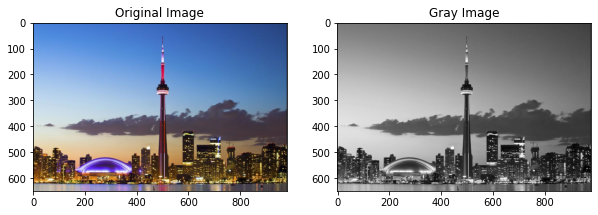

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


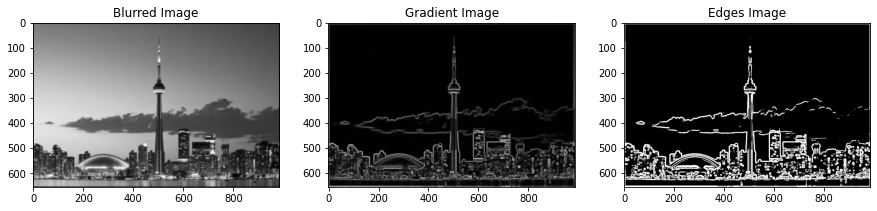

In [187]:
getResult('Q4_image_1.jpg')

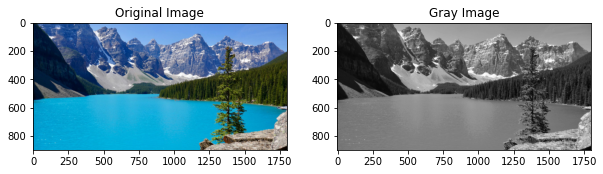

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


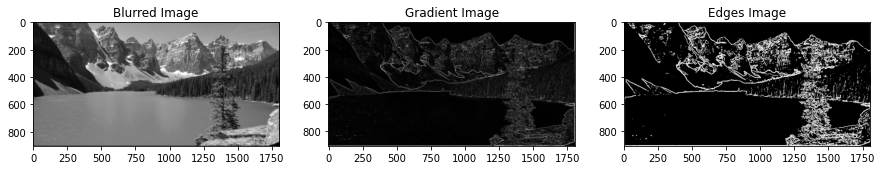

In [189]:
getResult('Q4_image_2.jpg')

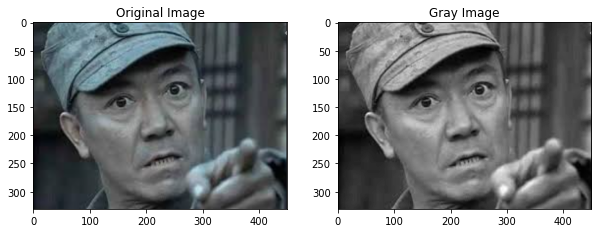

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


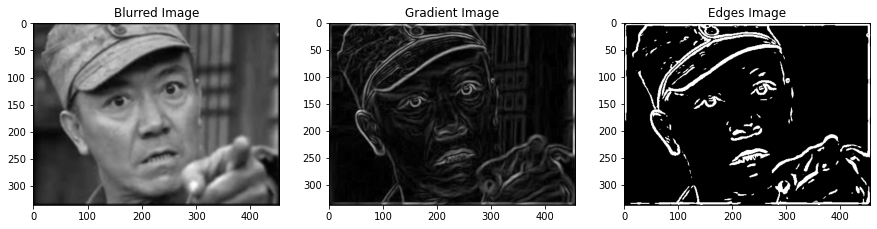

In [190]:
getResult('Yunlong.png')

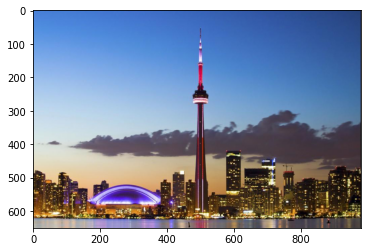

In [152]:
image = mpimg.imread('Q4_image_1.jpg')
plt.imshow(image)

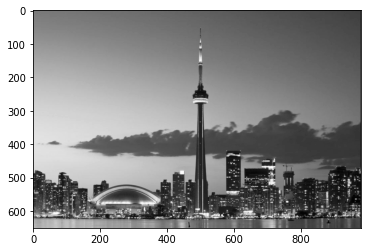

In [154]:
grayImage = rgb2gray(image)
plt.imshow(grayImage, cmap='gray')

In [167]:
gaussianImage = getGaussianBlur(grayImage, ksize=7, sigma=10)

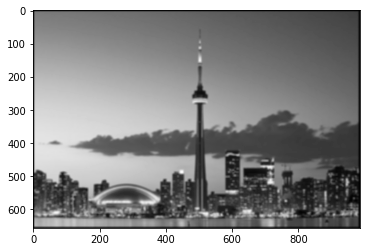

In [160]:
plt.imshow(gaussianImage, cmap='gray')

In [168]:
gradImage = getGradImage(gaussianImage)

In [146]:
gradImage

array([[1.72780128e+02, 3.86348111e+02, 4.88696000e+02, ...,
        2.03231820e+02, 9.71187530e+01, 9.76938729e+00],
       [3.86348111e+02, 5.18340383e+02, 4.88696000e+02, ...,
        2.61358092e+02, 1.99018681e+02, 2.18450141e+01],
       [4.88696000e+02, 4.88696000e+02, 2.84217094e-14, ...,
        2.32400000e+02, 2.45668000e+02, 2.76320000e+01],
       ...,
       [7.58466637e+02, 7.54943843e+02, 1.57588101e+01, ...,
        2.72029410e+02, 2.58335742e+02, 1.44669134e+01],
       [5.98037302e+02, 7.99846231e+02, 7.51280709e+02, ...,
        2.91562322e+02, 2.07838863e+02, 9.74613975e+00],
       [2.67450412e+02, 5.96916854e+02, 7.51216079e+02, ...,
        2.16611605e+02, 9.64969390e+01, 4.35860620e+00]])

In [169]:
edgesImage = edgeDetection(gradImage)

31.705534741890105
33.54269963904217
18.946124583298
9.537346203649122
4.701789631260169
2.3046801897816493
1.0515216279675315
0.5042468705678687
0.2563046254613681
0.12455497992448272
0.05797054979913696
0.031576928499930546
0.015427936004201115


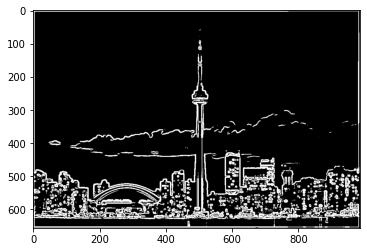

In [170]:
plt.imshow(edgesImage, cmap='gray')

In [137]:
gradImageTest = gradImage / np.max(gradImage)
gradImageTest

array([[1.90821922e-01, 4.26690790e-01, 5.39725901e-01, ...,
        2.24453396e-01, 1.07259946e-01, 1.07895120e-02],
       [4.26690790e-01, 5.72465767e-01, 5.39725901e-01, ...,
        2.88649246e-01, 2.19800319e-01, 2.41260823e-02],
       [5.39725901e-01, 5.39725901e-01, 3.13895198e-17, ...,
        2.56667334e-01, 2.71320786e-01, 3.05173484e-02],
       ...,
       [8.37666135e-01, 8.33775489e-01, 1.74043536e-02, ...,
        3.00434869e-01, 2.85311300e-01, 1.59775564e-02],
       [6.60484682e-01, 8.83366609e-01, 8.29729848e-01, ...,
        3.22007418e-01, 2.29541510e-01, 1.07638369e-02],
       [2.95377729e-01, 6.59247236e-01, 8.29658470e-01, ...,
        2.39230307e-01, 1.06573202e-01, 4.81373422e-03]])

In [138]:
gradImageTest *= 255.0
gradImageTest

array([[4.86595902e+01, 1.08806152e+02, 1.37630105e+02, ...,
        5.72356161e+01, 2.73512862e+01, 2.75132556e+00],
       [1.08806152e+02, 1.45978771e+02, 1.37630105e+02, ...,
        7.36055578e+01, 5.60490814e+01, 6.15215099e+00],
       [1.37630105e+02, 1.37630105e+02, 8.00432754e-15, ...,
        6.54501702e+01, 6.91868004e+01, 7.78192385e+00],
       ...,
       [2.13604864e+02, 2.12612750e+02, 4.43811017e+00, ...,
        7.66108915e+01, 7.27543816e+01, 4.07427688e+00],
       [1.68423594e+02, 2.25258485e+02, 2.11581111e+02, ...,
        8.21118915e+01, 5.85330851e+01, 2.74477842e+00],
       [7.53213209e+01, 1.68108045e+02, 2.11562910e+02, ...,
        6.10037282e+01, 2.71761664e+01, 1.22750223e+00]])

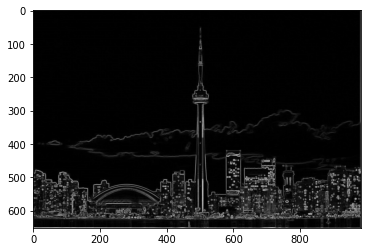

In [139]:
plt.imshow(gradImageTest, cmap='gray')